In [3]:
from PIL import Image, ImageFilter, ImageFont, ImageDraw, ImageEnhance

#Read image
im = Image.open( '130599961_1539064722950812_6284379654699997672_n.jpg')
from matplotlib.pyplot import imshow
#Display image
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [4]:
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x465 at 0x217EB2F0EB0>


In [5]:
def matriz(im, coresRGB):
    linha = []
    cont = 0
    for cor_rgb in im.getdata():   #transformando em matriz
        linha.append(cor_rgb)
        if(cont == im.size[0] - 1):
            coresRGB.append(linha)
            cont = -1
            linha = []
        cont = cont + 1
    return coresRGB

# Questao 1

### Conversão RGB-YIQ-RGB (cuidado com os limites de R, G e B na volta!)

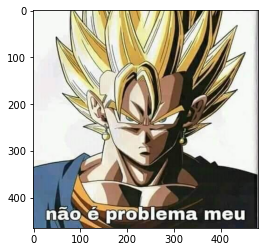

In [6]:
coresRGB1 = []
coresYIQ = []
coresRGB2 =[]
matriz(im, coresRGB1)
    
imshow(coresRGB1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


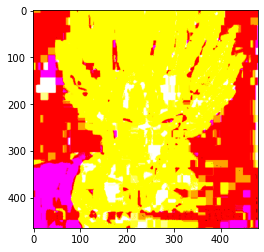

In [7]:

for linha in coresRGB1:   #transformando em YIQ
    vetor = []
    for rgb in linha:
        r = rgb[0]
        g = rgb[1]
        b = rgb[2]
        y = 0.30*r + 0.59*g + 0.11*b
        i = 0.74*(r-y) - 0.27*(b-y)
        q = 0.48*(r-y) + 0.41*(b-y)
        
        rgb2 = (y,i,q)
        vetor.append(rgb2)
    coresYIQ.append(vetor)
imshow(coresYIQ)

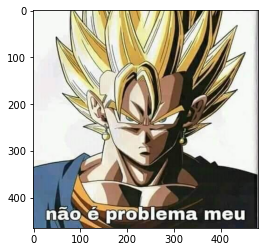

In [8]:
for linha in coresYIQ:    #transformando de volta para RGB
    vetor = []
    for yiq in linha:
        y = yiq[0]
        i = yiq[1]
        q = yiq[2]
        r = y + 0.9468822170900693*i + 0.6235565819861433*q
        g = y - 0.27478764629897834*i - 0.6356910791873801*q
        b = y - 1.1085450346420322*i + 1.7090069284064666*q
        if r < 0.0:
            r = 0.0
        if g < 0.0:
            g = 0.0
        if b < 0.0:
            b = 0.0
        if r > 255:
            r = 255
        if g > 255:
            g = 255
        if b > 255:
            b = 255
        r = int(round(r))
        g = int(round(g))
        b = int(round(b))
        yiq2 = (r,g,b)
        vetor.append(yiq2)
    coresRGB2.append(vetor)
imshow(coresRGB2)

In [9]:
if coresRGB1 == coresRGB2:     #verificando se as imagens são iguais
    print('true')

true


# Questão 2

### Negativo

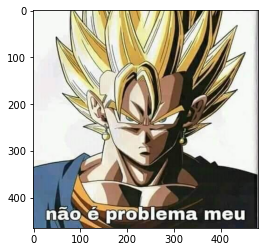

In [11]:
im2 = Image.open( '130599961_1539064722950812_6284379654699997672_n.jpg')
imgJogin = []
matriz(im2, imgJogin)
imshow(imgJogin)

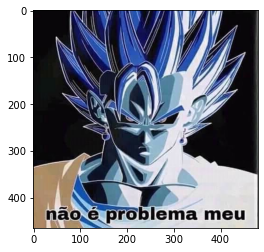

In [12]:
coresNeg = []
for linha in imgJogin:    #passando para negativo
    vetor = []
    for rgb in linha:
        r = 255 - rgb[0]
        g = 255 - rgb[1]
        b = 255 - rgb[2]
        rgb2 = (r,g,b)
        vetor.append(rgb2)
    coresNeg.append(vetor)
    
imshow(coresNeg)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


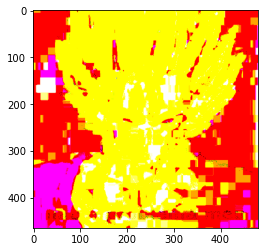

In [13]:
coresYIQ = []
for linha in imgJogin:   #transformando em YIQ
    vetor = []
    for rgb in linha:
        r = rgb[0]
        g = rgb[1]
        b = rgb[2]
        y = 0.30*r + 0.59*g + 0.11*b
        i = 0.74*(r-y) - 0.27*(b-y)
        q = 0.48*(r-y) + 0.41*(b-y)
     
        rgb2 = (y,i,q)
        vetor.append(rgb2)
    coresYIQ.append(vetor)
imshow(coresYIQ)



coresNegYIQ = []
for linha in coresYIQ:    #passando para negativo
    vetor = []
    for yiq in linha:
        y = 255 - yiq[0] 
        yiq2 = (y,yiq[1],yiq[2])
        vetor.append(yiq2)
    coresNegYIQ.append(vetor)
    
imshow(coresNegYIQ)

In [14]:
if coresYIQ == coresNegYIQ:     #verificando se as imagens são iguais
    print('true')
else: 
    print('false')

false


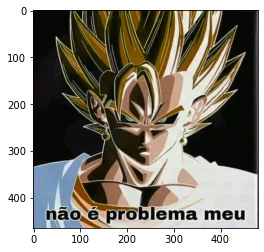

In [15]:
coresRGB3=[]
for linha in coresNegYIQ:    #transformando de volta para RGB
    vetor = []
    for yiq in linha:
        y = yiq[0]
        i = yiq[1]
        q = yiq[2]
        r = y + 0.9468822170900693*i + 0.6235565819861433*q
        g = y - 0.27478764629897834*i - 0.6356910791873801*q
        b = y - 1.1085450346420322*i + 1.7090069284064666*q
        if r < 0.0:
            r = 0.0
        if g < 0.0:
            g = 0.0
        if b < 0.0:
            b = 0.0
        if r > 255:
            r = 255
        if g > 255:
            g = 255
        if b > 255:
            b = 255
        r = int(round(r))
        g = int(round(g))
        b = int(round(b))
        yiq2 = (r,g,b)
        vetor.append(yiq2)
    coresRGB3.append(vetor)
imshow(coresRGB3)

# Questão 3

### Correlação m x n. Testar com filtros Média e Sobel

In [16]:
def exten(imgIN, n, m):
    extensao = []
    pixel0 = (0,0,0)
    extraLinhas = int(n/2)   #numero de linhas extras embaixo e em cima 
    extraColunas = int(m/2)  #numero de colunas extras a esquerda e direita
    tamLinhas = len(imgIN)     #numero de linhas da imagem original
    tamColunas = len(imgIN[0]) #numero de colunas da imagem original
    
    
    #linha(s) iniciais
    for i in range(extraLinhas):    #para cada linha extra no começo 
        linha = []
        for j in range(tamColunas + m): #para cada coluna no geral (anterior + novas)
            linha.append(pixel0)   
        extensao.append(linha)

    #linhas do meio
    for i in range(tamLinhas):   #para cada linha da imagem original
        linha = []
        for j in range(extraColunas): #para cada coluna extra no inicio na linha
            linha.append(pixel0)
        for k in range(tamColunas):  #para cada coluna na imagem original
            linha.append(imgIN[i][k])   #colocando os pixels originais na linha
        for l in range(extraColunas): #para cada coluna extra no fim na linha
            linha.append(pixel0)
        extensao.append(linha)

    #linha(s) finais
    for i in range(extraLinhas):    #para cada linha extra no fim 
        linha = []
        for j in range(tamColunas + m ): #para cada coluna no geral anterior + novas
            linha.append(pixel0)   
        extensao.append(linha)
    
    return extensao

In [17]:
def filtroMedia(n, m, imgIN):    #LINHA da mascara , COLUNA da mascara, IMAGEM
    
    #fazendo extensão
    imgOut = []
    
    extraLinhas = int(n/2)   #numero de linhas extras embaixo e em cima 
    extraColunas = int(m/2)  #numero de colunas extras a esquerda e direita
    tamLinhas = len(imgIN)     #numero de linhas da imagem original
    tamColunas = len(imgIN[0]) #numero de colunas da imagem original

    extensao = exten(imgIN,n,m)

    
    #filtro
    for i in range(extraLinhas, tamLinhas + extraLinhas):    #para cada linha da imagem original
        linha = []
        for j in range(extraColunas, tamColunas + extraColunas):   #para cada coluna da imagem original
            sumR = 0
            sumG = 0
            sumB = 0
            for k in range(i - extraLinhas, i + extraLinhas + 1):   #para cada linha periferica ao pixel original
                for l in range(j - extraColunas, j + extraColunas + 1): #para cada coluna periferica ao pixel original
                    sumR = sumR + extensao[k][l][0] 
                    sumG = sumG + extensao[k][l][1]
                    sumB = sumB + extensao[k][l][2]
            sumR = round(sumR/(n*m))
            sumG = round(sumG/(n*m))
            sumB = round(sumB/(n*m))
            
            pixel = (sumR, sumG, sumB)
            linha.append(pixel)
        imgOut.append(linha)

    return imgOut


In [18]:
n = 21 #tamanho da mascara
m = 21
imgMedia = filtroMedia(n, m, coresRGB1)


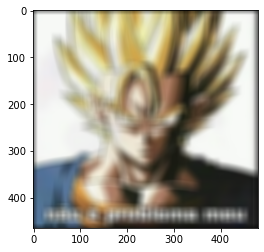

In [19]:
imshow(imgMedia)

In [20]:
def filtroSobelV(imgIN):
       
    #filtro sobel
    imgOut = []
    sobelV = []
    linha13 = [-1, 0, 1]
    linha2 = [-2, 0, 2]
    sobelV.append(linha13) #-1 0 1
    sobelV.append(linha2)  #-2 0 2
    sobelV.append(linha13) #-1 0 1
    
    #fazendo extensão
    
    extensao = exten(imgIN,3,3)
    
    tamLinhas = len(imgIN)
    tamColunas = len(imgIN[0])
    
    #filtro
    for i in range(1, tamLinhas + 1):
        linha = []
        for j in range(1, tamColunas + 1):
            sumR = 0
            sumG = 0
            sumB = 0
            sobelL = 0
            for k in range(i - 1, i + 2):
                sobelC = 0
                for l in range(j - 1, j + 2):
                    sumR = sumR + extensao[k][l][0]*sobelV[sobelL][sobelC]
                    sumG = sumG + extensao[k][l][1]*sobelV[sobelL][sobelC]
                    sumB = sumB + extensao[k][l][2]*sobelV[sobelL][sobelC]
                    sobelC = sobelC + 1
                sobelL = sobelL + 1
            sumR = round(sumR/9)
            sumG = round(sumG/9)
            sumB = round(sumB/9)
            
            pixel = (sumR, sumG,sumB)
            linha.append(pixel)
        imgOut.append(linha)

    return imgOut


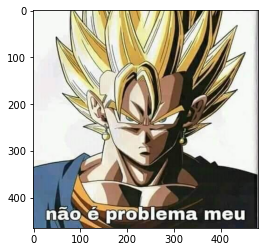

In [22]:
im = Image.open( '130599961_1539064722950812_6284379654699997672_n.jpg')
imgEinstein = []
matriz(im, imgEinstein)
imshow(imgEinstein)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


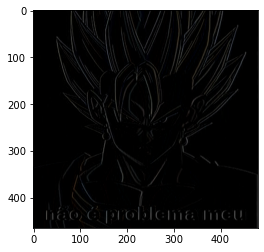

In [23]:
imgSobelV = filtroSobelV(imgEinstein)
imshow(imgSobelV)

In [24]:

def filtroSobelH(imgIN):
       
    #filtro sobel
    imgOut = []
    sobelH = []
    linha1 = [-1, -2, -1]
    linha2 = [0, 0, 0]
    linha3 = [1, 2, 1]
    sobelH.append(linha1)
    sobelH.append(linha2)
    sobelH.append(linha3)
    
    #fazendo extensão
    
    extensao = exten(imgIN,3,3)
    
    tamLinhas = len(imgIN)
    tamColunas = len(imgIN[0])
 
    #filtro
    for i in range(1, tamLinhas + 1):
        linha = []
        for j in range(1, tamColunas + 1):
            sumR = 0
            sumG = 0
            sumB = 0
            sobelL = 0
            for k in range(i - 1, i + 2):
                sobelC = 0
                for l in range(j - 1, j + 2):
                    sumR = sumR + extensao[k][l][0]*sobelH[sobelL][sobelC]
                    sumG = sumG + extensao[k][l][1]*sobelH[sobelL][sobelC]
                    sumB = sumB + extensao[k][l][2]*sobelH[sobelL][sobelC]
                    sobelC = sobelC + 1
                sobelL = sobelL + 1
            
            pixel = (round(sumR/9), round(sumG/9), round(sumB/9))
            linha.append(pixel)
        imgOut.append(linha)

    return imgOut


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


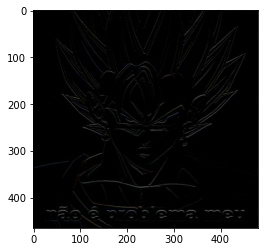

In [25]:
imgSobelH = filtroSobelH(imgEinstein)
imshow(imgSobelH)

# Questão 4

### Compare a aplicação do filtro média 25x25 com a aplicação do filtro média 25x1
### seguido pela aplicação do filtro média 1x25, em termos de tempo de processamento
### e resultado final

tempo de processamento 25x25:  34.546875


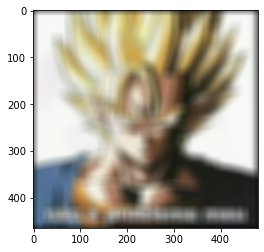

In [26]:
import time 
tic = time.process_time()
imgMedia = filtroMedia(25, 25, coresRGB1)
toc = time.process_time()
tempo = toc - tic
imshow(imgMedia)
print("tempo de processamento 25x25: ", tempo)

tempo de processamento 25x1:  3.28125


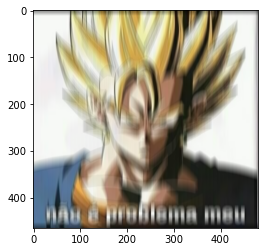

In [27]:
tic = time.process_time()
imgMedia = filtroMedia(25, 1, coresRGB1)
toc = time.process_time()
tempo = toc - tic
imshow(imgMedia)
print("tempo de processamento 25x1: ", tempo)

tempo de processamento 1x25:  1.6875


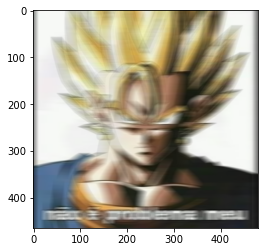

In [28]:
tic = time.process_time()
imgMedia = filtroMedia(1,25, coresRGB1)
toc = time.process_time()
tempo = toc - tic
imshow(imgMedia)
print("tempo de processamento 1x25: ", tempo)

# Questão 5

### Filtro mediana m x n

In [29]:
def filtroMediana(n, m, imgIN):    #LINHA, COLUNA, IMAGEM
    
    #fazendo extensão
    imgOut = []
    extensao = exten(imgIN,n,m)
    
    extraLinhas = int(n/2)
    extraColunas = int(m/2)
    tamLinhas = len(imgIN)
    tamColunas = len(imgIN[0])

    #filtro
    for i in range(extraLinhas, tamLinhas + extraLinhas):    #para cada linha da imagem original
        linha = []
        for j in range(extraColunas, tamColunas + extraColunas):   #para cada coluna da imagem original
            R = []
            G = []
            B = []
            for k in range(i - extraLinhas, i + extraLinhas + 1):   #para cada linha periferica ao pixel original
                for l in range(j - extraColunas, j + extraColunas + 1): #para cada coluna periferica ao pixel original
                    R.append(extensao[k][l][0])
                    G.append(extensao[k][l][1]) 
                    B.append(extensao[k][l][2])
            R.sort()
            G.sort()
            B.sort()
            if((len(R)%2)==0):
                medianaR = (R[(len(R)/2)-1]+ R[len(R)/2])/2
                medianaG = (G[(len(G)/2)-1]+ G[len(G)/2])/2
                medianaB = (B[(len(B)/2)-1]+ B[len(B)/2])/2
            else:
                medianaR = R[(int(len(R)/2))]
                medianaG = G[(int(len(G)/2))]
                medianaB = B[(int(len(B)/2))]
        
            
            pixel = (medianaR, medianaG, medianaB)
            linha.append(pixel)
        imgOut.append(linha)

    return imgOut


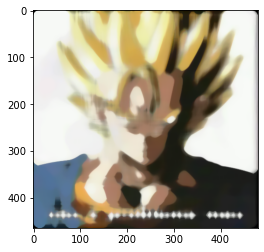

In [30]:
imgMediana=[]
imgMediana = filtroMediana(21,21, coresRGB1)
imshow(imgMediana)

# Questão 6

### Reproduza o exemplo em
### https://la.mathworks.com/help/images/ref/normxcorr2.html?lang=en com as
### imagens baboon.png e babooneye.png, mas aplicando a correlação normalizada
### banda a banda e tomando como resultado a média das três correlações em cada
### ponto. Você pode utilizar toda a funcionalidade da linguagem de programação de
### sua escolha, incluindo bibliotecas avançadas. 

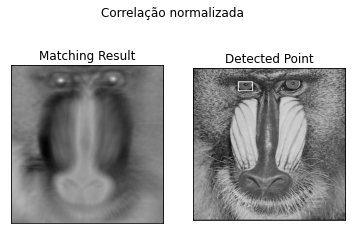

In [29]:
from scipy import signal
from scipy import misc
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

template = Image.open( 'babooneye.png')
face = Image.open( 'baboon.png')
(w, h) = template.size

face2 = np.float32(face)
template2 = np.float32(template)


method = eval('cv.TM_CCORR_NORMED')
# Aplicando matchTemplate
res = cv.matchTemplate(face2, template2, method)

min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

face = cv.cvtColor(face2, cv.COLOR_BGR2GRAY)

cv.rectangle(face,top_left, bottom_right, 255, 2)
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(face,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle('Correlação normalizada')
plt.show()


# Questão 7

### Reproduza o item 6 utilizando a função correlação desenvolvida no item 3.

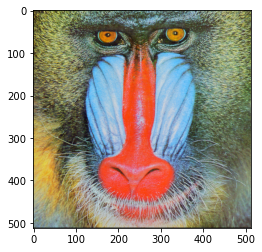

In [30]:
im1 = Image.open( 'baboon.png')
im2 = Image.open('babooneye.png')
imgIN = []
mask = []
linha = []

matriz(im1, imgIN)
    
matriz(im2, mask)

imshow(imgIN)

In [31]:
def corr(mask, imgIN):   
    
    #fazendo extensão
    imgOut = []
    n = len(mask)
    m = len(mask[0])
    
    extensao = exten(imgIN,n,m)
    
    extraLinhas = int(n/2)
    extraColunas = int(m/2)
    tamLinhas = len(imgIN)
    tamColunas = len(imgIN[0])
        
    #lista da máscara
    vetorW = []
    for i in range(n):          #percorrendo a mascara
        for j in range(m):
            vetorW.append(round((mask[i][j][0] + mask[i][j][1] + mask[i][j][2])/3))
            
    uh = statistics.mean(vetorW) #media da lista
    

    #filtro
    for i in range(extraLinhas, tamLinhas + extraLinhas):    #para cada linha da imagem original
        linha = []
        for j in range(extraColunas, tamColunas + extraColunas):   #para cada coluna da imagem original
            vetorV = []
            for k in range(i - extraLinhas, i + extraLinhas ):   #para cada linha periferica ao pixel original
                for l in range(j - extraColunas, j + extraColunas ): #para cada coluna periferica ao pixel original
                    vetorV.append(round((extensao[k][l][0] + extensao[k][l][1] + extensao[k][l][2])/3))
                    
            numerador = 0
            denomi1 = 0
            denomi2 = 0
            denominador = 0
            uv  = statistics.mean(vetorV) 
            for o in range(len(vetorV)):  
                V2 = vetorV[o] - uv      #vetorV - media de V (uv)
                H2 = vetorW[o] - uh      #vetorW - media de W (uh)
                numerador = numerador + V2*H2 #produto interno 
                denomi1 = denomi1 + V2**2 
                denomi2 = denomi2 + H2**2
            denominador = ((denomi1)**(1/2)) * ((denomi2)**(1/2))
            
            r = numerador/denominador
            r = round((r + 1) * 255 / 2)     #[-1,1] para [0, 255]
            
            pixel = (r, r, r)
            linha.append(pixel)
        imgOut.append(linha)

    return imgOut


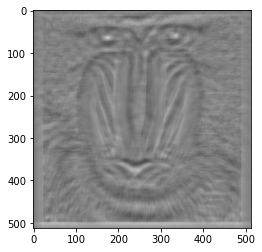

In [32]:
import statistics  

imgIN2 = corr(mask,imgIN)
imshow(imgIN2)


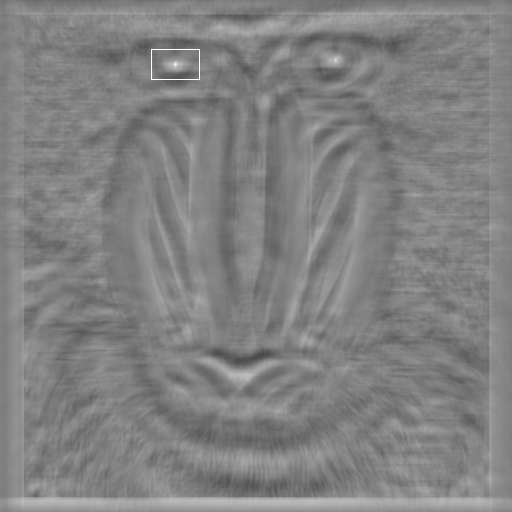

In [33]:

lista = []
for linha in imgIN2:   #colocando em uma lista padrão para exportar
    for pixel in linha:
        lista.append(pixel)

imgOut = Image.new(im1.mode,im1.size)

pixels = list(lista)
imgOut.putdata(pixels)
imgOut.save('babu.png')

 #retangulo
imgFinal = Image.open('babu.png').convert("RGBA")    #retangulo
coordenada = []
for i in range(len(imgIN2)):
    for j in range(len(imgIN2[0])):
        if(imgIN2[i][j][0] == 255):
                coordenada.append(j)
                coordenada.append(i)
                
for i in range(0, len(coordenada) - 1 ,2):   
    tumpleL = (coordenada[i] - int(len(mask[0])/2), coordenada[i+1] - int(len(mask)/2))
    tumpleR = (tumpleL[0]+len(mask[0]), tumpleL[1]+len(mask))
    draw = ImageDraw.Draw(imgFinal)
    draw.rectangle((tumpleL, tumpleR))
    
imgFinal